In [1]:
import numpy as np
# Solving the challenge described in https://www.coursereport.com/blog/cracking-the-bootcamp-interview-the-data-incubator

In [2]:
states = np.array([0,1,2,3,4,5,6,7,8,9])
num_states = len(states)
transitions = np.array([[4,6], [6,8], [7,9], [4,8], [0,3,9], [5], [0,1,7], [2,6], [1,3], [2,4]])

<ipython-input-2-ade0464c82f0>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  transitions = np.array([[4,6], [6,8], [7,9], [4,8], [0,3,9], [5], [0,1,7], [2,6], [1,3], [2,4]])


In [3]:
#Create a transition matrix P for Markov Chain with defined states and possible transitions
def populate_transition_matrix(states, transitions):
    transition_matrix = np.zeros((num_states,num_states))

    for i,state in enumerate(states):

        possible_moves = transitions[i]
        num_options = len(possible_moves)

        for possible_move in possible_moves:
            transition_matrix[i, possible_move] += 1/num_options
            
    return transition_matrix

In [4]:
transition_matrix = populate_transition_matrix(states, transitions)

In [24]:
#Probability of Knight being on a given number T jumps from s_0

def pmf(T, s_0):
    F = np.linalg.matrix_power(transition_matrix, T)[s_0]
    return F

In [81]:
#Expected Value of state at T, with initial state s_0

def E_state(T,s_0):
    E_state = pmf(T,s_0).dot(states)
    return E_state

In [82]:
#Expected Value of running sum SS at T, with initial state s_0

def E_SS(T,s_0):
    SS = 0
    for i in range(T):
        SS += E_state(i+1,s_0)
    return SS

In [97]:
#Given T = 10T10. Compute E S mod 10
#We have a function that can compute SS, which is 11 times S.

def main(T):
    T = 10010+T*100
    E_Smod10 = (E_SS(T,0)/11)%10
    return(E_Smod10)

In [99]:
main(4)

8.563636363635851

In [86]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

#Function to convert one dimensional array into numerical pad configuration
def arr_to_pad(p_array):
    numpad = np.zeros((4,3))
    numpad[0] = p_array[1:4]
    numpad[1] = p_array[4:7]
    numpad[2] = p_array[7:10]
    numpad[3][1] = p_array[0]
    return numpad

def plot_pmf(T):

    im = arr_to_pad(pmf(T,0))

    # Create figure and axes
    fig,ax = plt.subplots(1)

    pos = ax.imshow(im, cmap='Blues', interpolation='none')

    fig.colorbar(pos, ax=ax)

    # Create a Rectangle patch
    rect = Rectangle((-0.5,2.5),1,1,linewidth=1,edgecolor='w',facecolor='w')
    rect2 = Rectangle((1.5,2.5),1,1,linewidth=1,edgecolor='w',facecolor='w')
    #Add the patch to the Axes
    ax.add_patch(rect)
    ax.add_patch(rect2)

    ax.text(0,0, '1', fontsize = 20, c = 'r')
    ax.text(1,0, '2', fontsize = 20, c = 'r')
    ax.text(2,0, '3', fontsize = 20, c = 'r')
    ax.text(0,1, '4', fontsize = 20, c = 'r')
    ax.text(1,1, '5', fontsize = 20, c = 'r')
    ax.text(2,1, '6', fontsize = 20, c = 'r')
    ax.text(0,2, '7', fontsize = 20, c = 'r')
    ax.text(1,2, '8', fontsize = 20, c = 'r')
    ax.text(2,2, '9', fontsize = 20, c = 'r')
    ax.text(1,3, '0', fontsize = 20, c = 'r')

    plt.axis('off')
    plt.show()

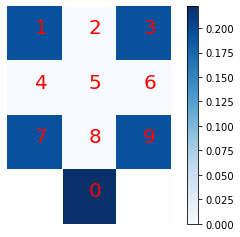

In [95]:
plot_pmf(4)